# Image Filtering

### Moving average in 1D - Uniform weights

In [128]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

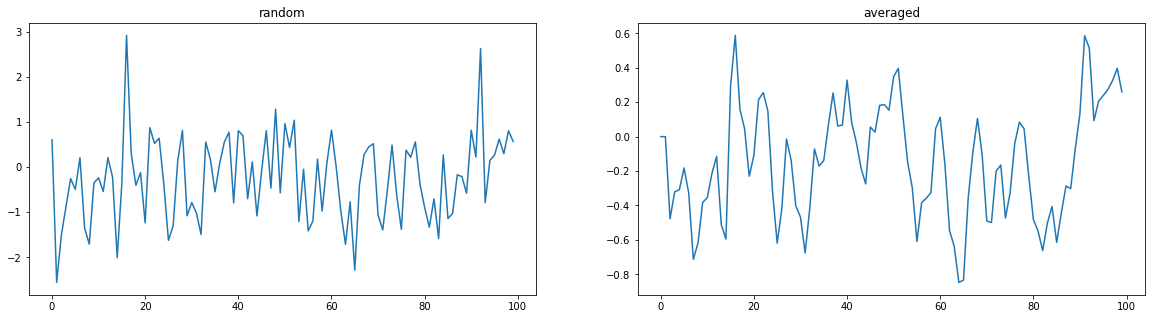

In [129]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))

rand_1d = np.random.randn(100)
ax[0].plot(rand_1d)
ax[0].set_title('random')

# moving average of 5 numbers.
width = 5
assert width & 1 # check if odd.
for idx in range(len(rand_1d)):
    if not idx - 2 < 0 or not idx + 2 > len(rand_1d):
        average = sum(rand_1d[idx - 2 : idx + 2]) / 5
        rand_1d[idx] = average

ax[1].plot(rand_1d)
ax[1].set_title('averaged')
plt.show()

### Moving average in 2D - Uniform weights

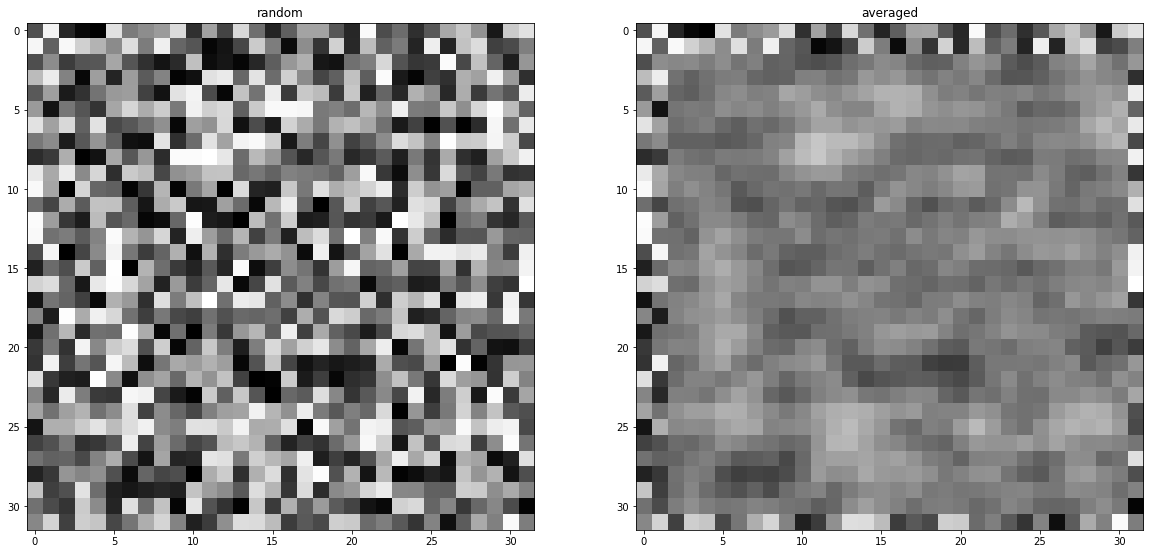

In [149]:
rand_2d = np.random.rand(32, 32)

fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(rand_2d, 'gray')
ax[0].set_title('random')

# moving average of 3 by 3 pixels
# won't calculate the edges :(
def moving_averages_uniform_2d(arr):
    for i in range(len(arr)):
        if i - 2 < 0 or i + 2 > len(arr):
            continue
        for j in range(len(arr[i])):
            if j - 2 < 0 or j + 2 > len(arr[i]):
                continue
            # uniform weights
            arr[i][j] = ( arr[i-1][j-1] + arr[i-1][j] + arr[i-1][j+1] +
                              arr[i][j-1]   + arr[i][j]   + arr[i][j+1]   +
                              arr[i+1][j-1] + arr[i+1][j] + arr[i+1][j+1])/ 9

moving_averages_uniform_2d(rand_2d)
ax[1].imshow(rand_2d, 'gray')
ax[1].set_title('averaged')

plt.show()

This is called **correlation filtering** - uniform weights.

/Users/osmanmesutozcan/.pyenv/versions/anaconda3-4.4.0/envs/cv/lib/python3.5/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars


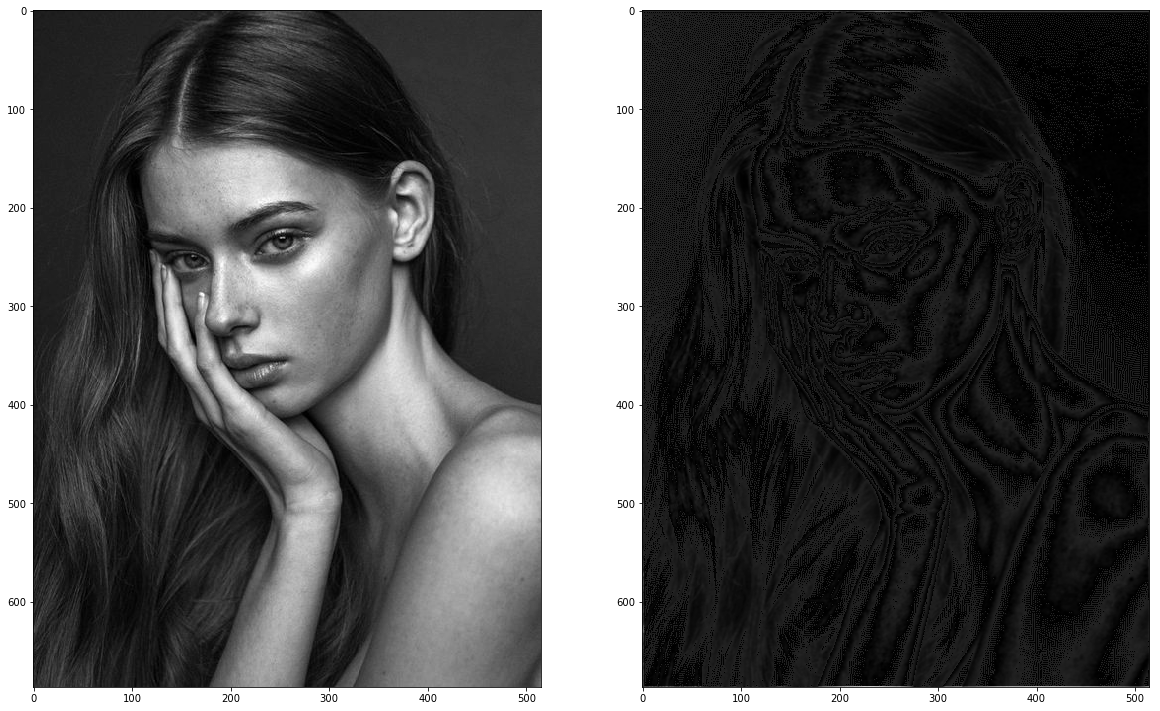

In [165]:
im = cv.imread('data/portrait.jpg', 0)

fix, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(im, 'gray', interpolation='none')

moving_averages_uniform_2d(im)
ax[1].imshow(im, 'gray', interpolation='none')
plt.show()